### Student Information
Name: 張瀷鏵

Student ID: 106020025

GitHub ID: 9016037

Kaggle name: DOODOODAADAA

Kaggle private scoreboard snapshot: 

![Snapshot](pics/grades.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [2]:
### Begin Assignment Here


### Data preprocessing

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### EX1

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [3]:
import heapq
#BULID a function to get top 30 
def find_top(top,data_counts):
    C = data_counts.toarray()
    heap = list()
    for i in range(0,data_counts.shape[1]):
        heap.append(sum(C[:,i]))
    max_index = map(heap.index,heapq.nlargest(top,heap))
    top_index = sorted(list(max_index))
    return top_index

In [4]:
train_counts = count_vect.fit_transform(train_df.text) #transform first
top_train = find_top(30,train_counts)
top_train_word = [str(i) for i in [count_vect.get_feature_names()[k] for k in top_train]]

test_counts = count_vect.fit_transform(test_df.text)
top_test = find_top(30,test_counts)
top_test_word = [str(i) for i in [count_vect.get_feature_names()[k] for k in top_test]]

In [5]:
print(top_train_word)
print(top_test_word)

['all', 'all', 'and', 'are', 'at', 'be', 'but', 'can', 'for', 'have', 'if', 'in', 'is', 'it', 'just', 'me', 'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'was', 'when', 'with', 'you', 'your']
['all', 'all', 'all', 'and', 'are', 'are', 'are', 'be', 'but', 'but', 'can', 'for', 'in', 'is', 'it', 'it', 'like', 'like', 'like', 'like', 'like', 'me', 'my', 'on', 'so', 'so', 'that', 'the', 'to', 'you']


### EX2

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
# build analyzers (bag-of-words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
vectorizer = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)  
vec_idf_train = vectorizer.fit_transform(train_df['text'])
pd.DataFrame(vec_idf_train.toarray(),columns=vectorizer.get_feature_names())

feature_names_1000 = vectorizer.get_feature_names()
feature_names_1000[100:110]

['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

### EX3

In [8]:
# training data 的準確度很高,但testing data的準確度降到66%,可能有overfitting的問題
# 但是以一個簡單的模型來說decision tree可以達到66%已經很不錯了
# 各種情緒的precision和recall其實都差不多,sadness的f1-score最低,但因為testing data也最少,所以可能是誤差
# confusion matrix 來看,對角線的數值最高,其餘的數值都還蠻平均的.

### EX4

In [18]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

C:\Python38\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [14]:
model_G = GaussianNB()
model_G.fit(X_train.todense(),y_train)
model_M = MultinomialNB()
model_M.fit(X_train.todense(),y_train)
model_B = BernoulliNB()
model_B.fit(X_train.todense(),y_train)

BernoulliNB()

In [15]:
print(model_G.score(X_test.todense(),y_test))
print(model_M.score(X_test.todense(),y_test))
print(model_B.score(X_test.todense(),y_test))

0.6426512968299711
0.6974063400576369
0.6887608069164265


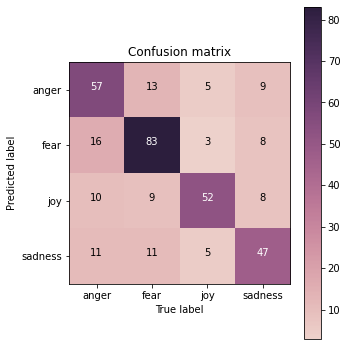

In [19]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
y_test_pred = model_B.predict(X_test.todense())
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### EX5

In [20]:
#Answer here
#Naive Bayes model 中表現最好的是 BernoulliNB,其特性為適合1/0的分類
#可能是因為這次的feature數量只有四個,所以BernoulliNB表現較為突出

### EX6

Codes are in Lab2_master 

![avatar](./pics/KERA1.png) ![avatar](./pics/KERA2.png)

### EX7

In [22]:
# Answer here
# 我們總共有四種feature, 將每個word的對這四種featrue的4個vector分別計算,並且個每篇文章中的的vector總和(設為sum[4])
# 用每篇文章的sum[4]和y_train去做訓練,找出critical value

### EX8

Codes are in Lab2_master 

![avatar](./pics/EX8.png)